In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from pylibdmtx.pylibdmtx import decode

In [2]:
qr=cv2.imread("/home/ayush/Downloads/warped_qrcode.png", cv2.IMREAD_GRAYSCALE)
(thresh, qr) = cv2.threshold(qr, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

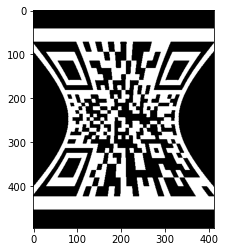

In [3]:
plt.imshow(qr, cmap="gray")

In [4]:
qr.shape

(496, 411)

In [5]:
qr_new=qr[75:425,:]

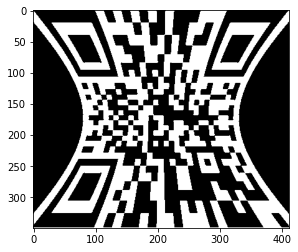

In [6]:
plt.imshow(qr_new, cmap="gray")

In [7]:
qr_new.shape

(350, 411)

In [8]:
# qr_new[int(qr_new.shape[0]/2),:].tolist().index(255)

In [9]:
list_1=[]
count=0
def unwrap(image):
    qr_0=image[0:int(image.shape[0]/2),:]
    qr_1=image[int(image.shape[0]/2):image.shape[0],:]
    width,height=image.shape[1],int(image.shape[0]/2)
    if(height>90):
        x=11
    else:
        x=6
    curve_x=(image[int(image.shape[0]/2),:].tolist().index(255))+x
    curve_y=int(image.shape[0]/2)
    
    pts_1=np.float32([[0,0],[width,0],[curve_x,curve_y],[width-curve_x,curve_y]])
    pts_2=np.float32([[curve_x,0],[width-curve_x,0],[0,height],[width,height]])
    pts_f=np.float32([[0,0],[width,0],[0,height],[width,height]])  
    
    matrix_u=cv2.getPerspectiveTransform(pts_1,pts_f)
    matrix_l=cv2.getPerspectiveTransform(pts_2,pts_f)
    
    imageOutput_u=cv2.warpPerspective(qr_0,matrix_u,(width,height))
#     plt.figure()
#     plt.imshow(imageOutput_u)
    list_1.append(imageOutput_u)
    imageOutput_l=cv2.warpPerspective(qr_1,matrix_l,(width,height))
#     plt.figure()
#     plt.imshow(imageOutput_l)
    list_1.append(imageOutput_l)
    if(height>50):
        unwrap(imageOutput_u)
        unwrap(imageOutput_l)

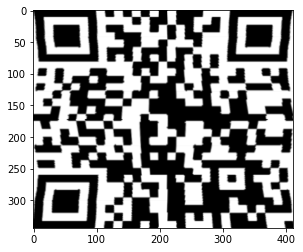

In [10]:
unwrap(qr_new)
vis_1 = np.concatenate(list_1[4:8], axis=0)
vis_2=  np.concatenate(list_1[10:14],axis=0)
vis=np.concatenate((vis_1,vis_2),axis=0)
plt.imshow(vis, cmap="gray")

In [11]:
dm_1=cv2.imread("/home/ayush/Downloads/datamatrix_sample2_130x116.png")

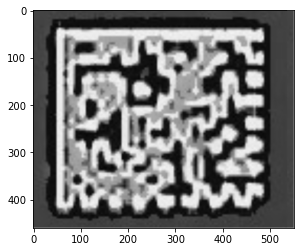

In [12]:
plt.imshow(dm_1)

In [13]:
# pts_11=np.float32([[20,20],[480,20],[20,450],[500,440]])
pts_11=np.float32([[25,20],[505,20],[25,440],[505,440]])
# pts_11=np.float32([[60,10],[500,50],[10,400],[450,440]])
pts_ff=np.float32([[0,0],[450,0],[0,450],[450,450]])  

matrix_uu=cv2.getPerspectiveTransform(pts_11,pts_ff)

imageOutput_u=cv2.warpPerspective(dm_1,matrix_uu,(450,450))

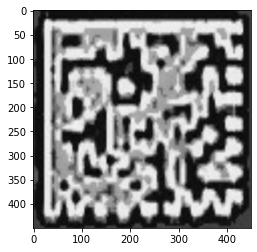

In [14]:
plt.imshow(imageOutput_u)

In [15]:
imageOutput_uu = cv2.cvtColor(imageOutput_u, cv2.COLOR_BGR2GRAY)

# thresh = 60
# im_orig = cv2.threshold(imageOutput_uu, thresh, 255, cv2.THRESH_BINARY)[1]
(thresh, im_orig) = cv2.threshold(imageOutput_uu, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

In [16]:
w,h=im_orig.shape

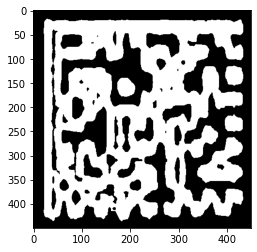

In [17]:
plt.imshow(im_orig, cmap="gray")

In [18]:
ret, contours, hier = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# create emtpy mask
mask = np.ones(image.shape[:2], dtype=image.dtype)

# draw all contours larger than 20 on the mask
for c in contours:
    if cv2.contourArea(c) > 20:
        x, y, w, h = cv2.boundingRect(c)
        cv2.drawContours(mask, [c], 0, (255), -1)

error: OpenCV(4.4.0) /tmp/pip-req-build-6179nsls/opencv/modules/imgproc/src/contours.cpp:195: error: (-210:Unsupported format or combination of formats) [Start]FindContours supports only CV_8UC1 images when mode != CV_RETR_FLOODFILL otherwise supports CV_32SC1 images only in function 'cvStartFindContours_Impl'


In [ ]:
decode(imageOutput_u)

In [ ]:
decode(im_orig)

In [19]:
im_visualise=im_orig.copy()

In [20]:
for x in range(22):
    p1 = (round(x*w/22),0)
    p2 = (round(x*w/22),h)
    cv2.line(im_visualise,p1,p2,(255),1)

for y in range(21):
    p1 = (0,round(y*h/22))
    p2 = (w,round(y*h/22))
    cv2.line(im_visualise,p1,p2,(255),1)

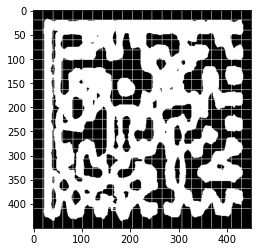

In [21]:
plt.imshow(im_visualise, cmap='gray')

In [22]:
qr = np.ones((22,22))

In [23]:
for y in range(22):
    for x in range(22):
        x1,y1 = (round(x*w/22),round(y*h/22))
        x2,y2 = (round(x1+20),round(y1+20))

        im_box = imageOutput_uu[y1:y2,x1:x2]
        if np.average(im_box)<140 and qr[y,x]!=0:#0.6 need tweaking
            qr[y,x]=0

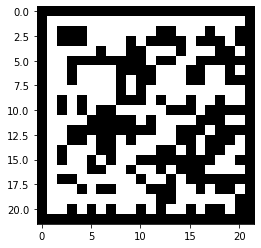

In [24]:
plt.imshow(qr, cmap="gray")

In [25]:
decode(qr)

[]

In [26]:
qr.shape

(22, 22)